In [1]:
import pandas as pd
import numpy as np

In [3]:
HLMData= pd.read_csv("../CSV/HLMComments.csv",encoding="utf-8")
HLMData

,短评
0,盛衰之理，本为天命。然而人心就是如此。眼见得他起高楼，于是便不忍心见他楼塌了。见过他鼎盛的时...
1,第一次看《红楼梦》，是小学五年级。因所有人都说，这是部名著，于是，期末考后，怀着极大的敬意与...
2,亲戚是干什么用的大全
3,长这么大，到今天才把这部奇书读完。觉得并没有那么多微言大义，倒是曹雪芹的文笔实在了得，对人的...
4,一个呼吁：那些清穿小说的主人公你们风花雪月以后就不能顺道送曹雪芹个打印机么？
...,...
195,看一遍远远不够
196,"看到说自己第一次看到XXOO情节的书的帖子,突然想到9岁时看完全不懂云雨情节,宝玉梦遗的情节..."
197,看过很多遍，还想继续看很多遍的书
198,我是情节派的，确实是吸引人的故事。


In [4]:
HLMData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   短评      199 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [6]:
HLMData["短评"].isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [10]:
HLMData.loc[HLMData["短评"].isnull().values]="无"
HLMData.loc[88,["短评"]]

短评    无
Name: 88, dtype: object

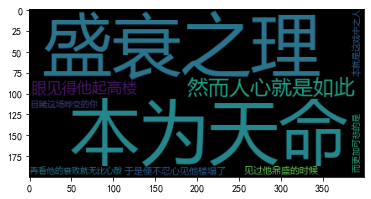

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
myWordCloud=WordCloud(font_path="../msyh.ttc").generate(HLMData["短评"][0])
plt.imshow(myWordCloud)

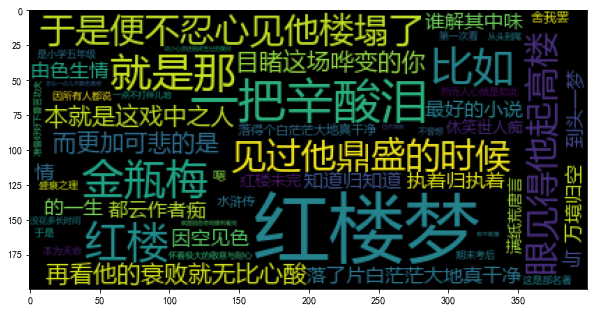

In [16]:
AllComments=HLMData["短评"].str.cat()
plt.figure(figsize=(10,8))
myWordCloud=WordCloud(font_path="../msyh.ttc").generate(AllComments)
plt.imshow(myWordCloud)

In [19]:
# 中文分词工具：jieba，nlik
from snownlp import SnowNLP
SnowNLP("我今天特别高兴").words

['我', '今天', '特别', '高兴']

In [20]:
SnowNLP("我今天特别高兴").sentiments

0.606392694063927

In [30]:
AllCommentsWordList=SnowNLP(AllComments).words
print(AllCommentsWordList)

['盛衰', '之', '理', '，', '本', '为', '天命', '。', '然而', '人心', '就是', '如此', '。', '眼见得', '他起', '高楼', '，', '于是', '便', '不', '忍心', '见', '他楼', '塌', '了', '。', '见', '过', '他', '鼎盛', '的', '时候', '，', '再', '看', '他', '的', '衰败', '就', '无比', '心酸', '。', '而', '更加', '可悲', '的', '是', '，', '目睹', '这', '场', '哗变', '的', '你', '，', '本', '就', '是', '这', '戏', '中', '之', '人', '。', '第一', '次', '看', '《', '红楼梦', '》，', '是', '小学', '五', '年级', '。', '因', '所有', '人', '都', '说', '，', '这', '是', '部', '名著', '，', '于是', '，', '期末', '考', '后', '，', '怀着', '极大', '的', '敬意', '与', '耐心', '，', '准备', '好好', '下番', '苦功夫', '。', '不曾', '想', '，', '从头到尾', '，', '一点', '不', '打绊', '儿', '地', '，', '没', '花', '多', '长', '时间', '，', '就', '囫', '囵', '吞枣', '地', '顺利', '看', '完', '，', '幼小', '心灵', '还', '因此', '生出', '些', '疑问', '：', '怎么', '一点儿', '不象', '名著', '呀', '，', '即', '不', '难懂', '，', '也', '不', '深刻', '，', '不', '就是', '些', '家长', '里', '短', '的', '故事', '集锦', '吗', '！', '留下', '印象', '的', '，', '不', '是', '爱情', '纠葛', '，', '不', '是', '阶级', '矛盾', '，', '不', '是', '白', '茫茫', '一', '片', '真', '干净', 

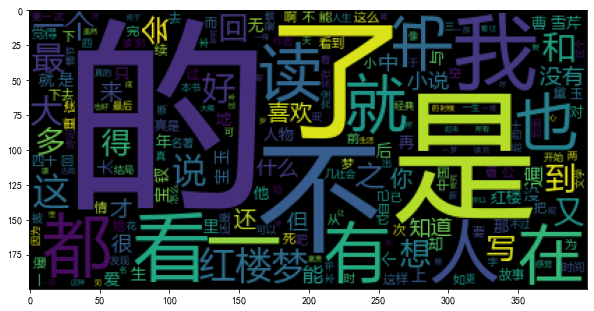

In [34]:
plt.figure(figsize=(10,8))
myWordCloud = WordCloud(font_path="../msyh.ttc").generate(" ".join(AllCommentsWordList))
plt.imshow(myWordCloud)

In [26]:
AllcommentsWordList_New=[eachWord for eachWord in AllCommentsWordList if len(eachWord)>1 ]
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

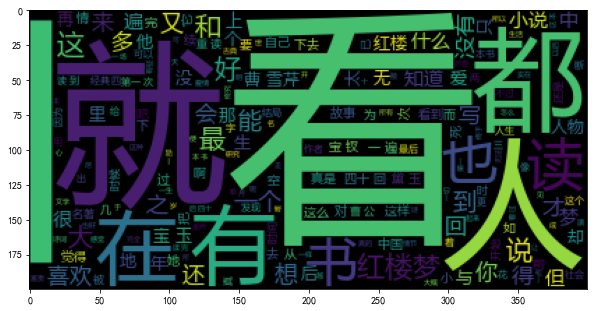

In [37]:
#停用词
StopWordList = ["的","了","我","不","是"]
plt.figure(figsize=(10,8))
myWordCloud = WordCloud(font_path="../msyh.ttc",stopwords=StopWordList).generate(" ".join(AllCommentsWordList))
plt.imshow(myWordCloud)

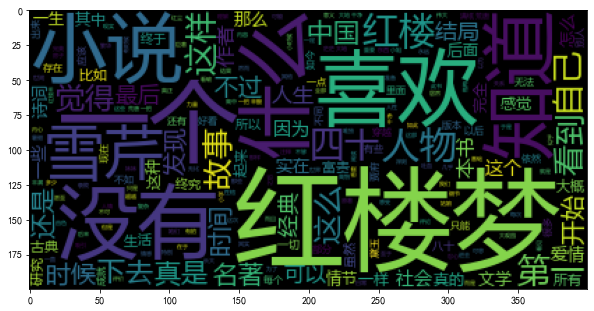

In [39]:
AllCommentsWordsList_New = [eachWord for eachWord in AllCommentsWordList if len(eachWord)>1]
plt.figure(figsize=(10,8))
myWordCloud = WordCloud(font_path="../msyh.ttc").generate(" ".join(AllCommentsWordsList_New))
plt.imshow(myWordCloud)

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼', '万一', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也罢', '了', '二来', '于', '于是', '于是乎', '云云', '云尔', '些', '亦', '人', '人们', '人家', '什么', '什么样', '今', '介于', '仍', '仍旧', '从', '从此', '从而', '他', '他人', '他们', '以', '以上', '以为', '以便', '以免', '以及', '以故', '以期', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '似的', '但', '但凡', '但是', '何', '何以', '何况', '何处', '何时', '余外', '作为', '你', '你们', '使', '使得', '例如', '依', '依据', '依照', '便于', '俺', '俺们', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '傥然', '像', '儿', '先不先', '光是', '全体', '全部', '

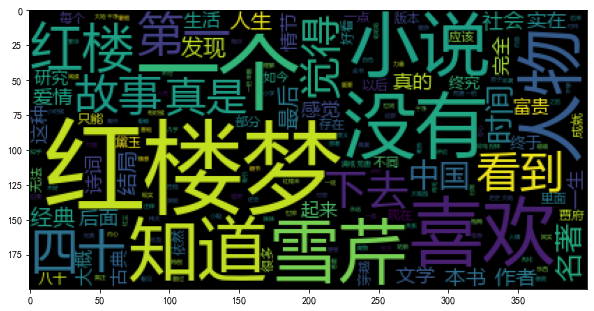

In [42]:
with open("../中文停用词库.txt",mode = "r+",encoding="GBK") as Handle:
    StopWordList_New = Handle.read().split("\n")
print(StopWordList_New)
plt.figure(figsize=(10,8))
myWordCloud = WordCloud(font_path="../msyh.ttc",stopwords=StopWordList_New).generate(" ".join(AllCommentsWordsList_New))
plt.imshow(myWordCloud)

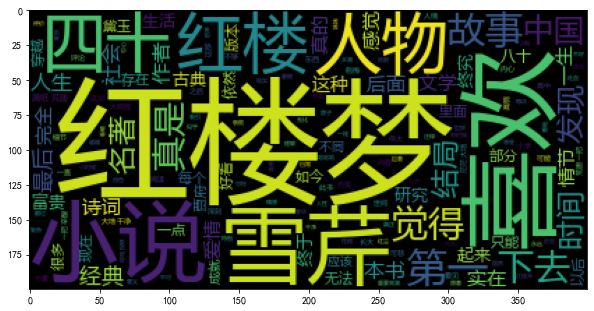

In [44]:
StopWordList_New.extend(["一个","没有","看到","知道","大概"])
plt.figure(figsize=(10,8))
myWordCloud = WordCloud(font_path="../msyh.ttc",stopwords=StopWordList_New).generate(" ".join(AllCommentsWordsList_New))
plt.imshow(myWordCloud)

In [47]:
MaskImage = plt.imread("../Images/530.png")
MaskImage

array([[[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8]],

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8]],

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8]],

       ...,

       [[0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       [[0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       [[0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        [0.8, 0.8, 0.8],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]]

In [48]:
np.max(np.array(myWordCloud))
MaskImage1 = MaskImage*255
MaskImage1

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [204., 204., 204.],
        [204., 204., 204.],
        [204., 204., 204.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [204., 204., 204.],
        [204., 204., 204.],
        [204., 204., 204.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [204., 204., 204.],
        [204., 204., 204.],
        [204., 204., 204.]],

       ...,

       [[204., 204., 204.],
        [204., 204., 204.],
        [204., 204., 204.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[204., 204., 204.],
        [204., 204., 204.],
        [204., 204., 204.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[204., 204., 204.],
        [204., 204., 204.],
        [204., 2

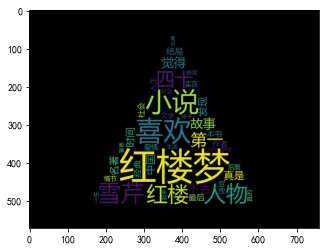

In [50]:
myWordCloud = WordCloud(font_path="../msyh.ttc",
                        mask = MaskImage1,
                        stopwords=StopWordList_New,
                        max_words=40).generate(" ".join(AllCommentsWordsList_New))
plt.imshow(myWordCloud)
plt.savefig("HLMCloud.jpg")

In [51]:
HLMData["情感指数"] = HLMData["短评"].map(lambda row: SnowNLP(row).sentiments)
HLMData.head()

,短评,情感指数
0,盛衰之理，本为天命。然而人心就是如此。眼见得他起高楼，于是便不忍心见他楼塌了。见过他鼎盛的时...,0.998819
1,第一次看《红楼梦》，是小学五年级。因所有人都说，这是部名著，于是，期末考后，怀着极大的敬意与...,1.000000
2,亲戚是干什么用的大全,0.136162
3,长这么大，到今天才把这部奇书读完。觉得并没有那么多微言大义，倒是曹雪芹的文笔实在了得，对人的...,0.999973
4,一个呼吁：那些清穿小说的主人公你们风花雪月以后就不能顺道送曹雪芹个打印机么？,0.739022


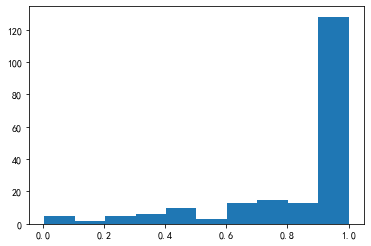

In [52]:
plt.hist(HLMData["情感指数"]);

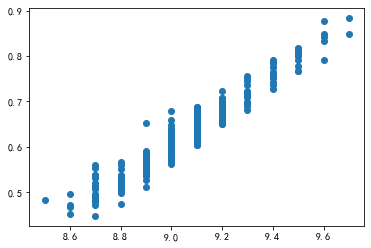

In [53]:
doubanData=pd.read_csv("../CSV/doubanTop250-8-revised.csv",encoding="utf-8")
plt.scatter("评分","5星百分比",data=doubanData)

## 直线公式：
也就是线性回归所使用的模型  
$$y=k*x+b$$

$y$: 5星评分比  
$x$: 评分  
$k$: 相关性 coffine  
$b$: 截距 interception  

In [58]:
from sklearn.linear_model import LinearRegression
doubanModel=LinearRegression() #k,b随机数值

x = doubanData["评分"].values.reshape(-1,1)
x   #作为输入，[样本数，数据]


array([[9.6],
       [9.4],
       [9.4],
       [9.7],
       [9.5],
       [9.3],
       [9.3],
       [9.3],
       [9.2],
       [9.3],
       [9.3],
       [9.2],
       [9.1],
       [9.3],
       [9.2],
       [9.2],
       [9.2],
       [9.3],
       [9.3],
       [9.2],
       [9.2],
       [9.2],
       [9.2],
       [9.5],
       [9.1],
       [9.2],
       [9.1],
       [9.2],
       [9.2],
       [9.6],
       [9.1],
       [9. ],
       [9. ],
       [9.3],
       [9.2],
       [9.2],
       [9.1],
       [9.2],
       [9.1],
       [9.1],
       [9.1],
       [9.1],
       [9.1],
       [9. ],
       [9.1],
       [9.4],
       [9.6],
       [9. ],
       [9.1],
       [9. ],
       [9.1],
       [9. ],
       [9.1],
       [9.1],
       [8.9],
       [9. ],
       [9. ],
       [9.1],
       [9. ],
       [9. ],
       [9.4],
       [9.1],
       [8.9],
       [9.1],
       [8.9],
       [9.2],
       [9.5],
       [8.9],
       [9. ],
       [9.1],
       [9. ],
      

In [59]:

y = doubanData["5星百分比"].values
y

array([0.842, 0.776, 0.743, 0.849, 0.818, 0.698, 0.709, 0.713, 0.689,
       0.745, 0.736, 0.684, 0.657, 0.689, 0.683, 0.723, 0.674, 0.697,
       0.752, 0.681, 0.7  , 0.677, 0.66 , 0.811, 0.622, 0.695, 0.605,
       0.696, 0.669, 0.848, 0.642, 0.588, 0.679, 0.757, 0.708, 0.687,
       0.648, 0.69 , 0.671, 0.631, 0.68 , 0.612, 0.636, 0.58 , 0.627,
       0.792, 0.792, 0.569, 0.651, 0.563, 0.678, 0.611, 0.653, 0.648,
       0.575, 0.593, 0.577, 0.626, 0.614, 0.635, 0.764, 0.615, 0.553,
       0.688, 0.568, 0.665, 0.816, 0.55 , 0.613, 0.663, 0.577, 0.791,
       0.647, 0.669, 0.693, 0.58 , 0.62 , 0.591, 0.666, 0.651, 0.649,
       0.592, 0.784, 0.752, 0.573, 0.689, 0.643, 0.566, 0.592, 0.617,
       0.58 , 0.568, 0.714, 0.612, 0.812, 0.518, 0.68 , 0.612, 0.604,
       0.551, 0.877, 0.53 , 0.67 , 0.621, 0.625, 0.516, 0.591, 0.619,
       0.728, 0.569, 0.585, 0.641, 0.679, 0.568, 0.722, 0.64 , 0.584,
       0.533, 0.691, 0.573, 0.67 , 0.556, 0.497, 0.676, 0.516, 0.678,
       0.667, 0.755,

In [60]:
doubanModel.fit(x,y)

LinearRegression()

In [61]:
doubanModel.coef_[0], doubanModel.intercept_

(0.37251660577176154, -2.7458994682190863)

In [62]:
from IPython.display import Latex
Latex(f"$y={doubanModel.coef_[0]:.2f}x{doubanModel.intercept_:+.2f}$")

<IPython.core.display.Latex object>

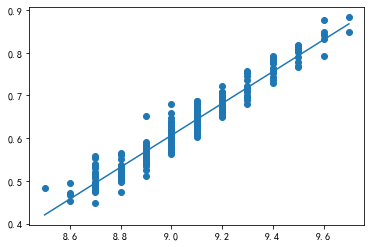

In [63]:
plt.scatter(x,y)
x1 = doubanData["评分"].sort_values()
y1 = doubanModel.predict(x1.values.reshape(-1,1))
plt.plot(x1,y1)